In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


file_path = "./GPTStats.csv"
df = pd.read_csv(file_path, nrows=6)




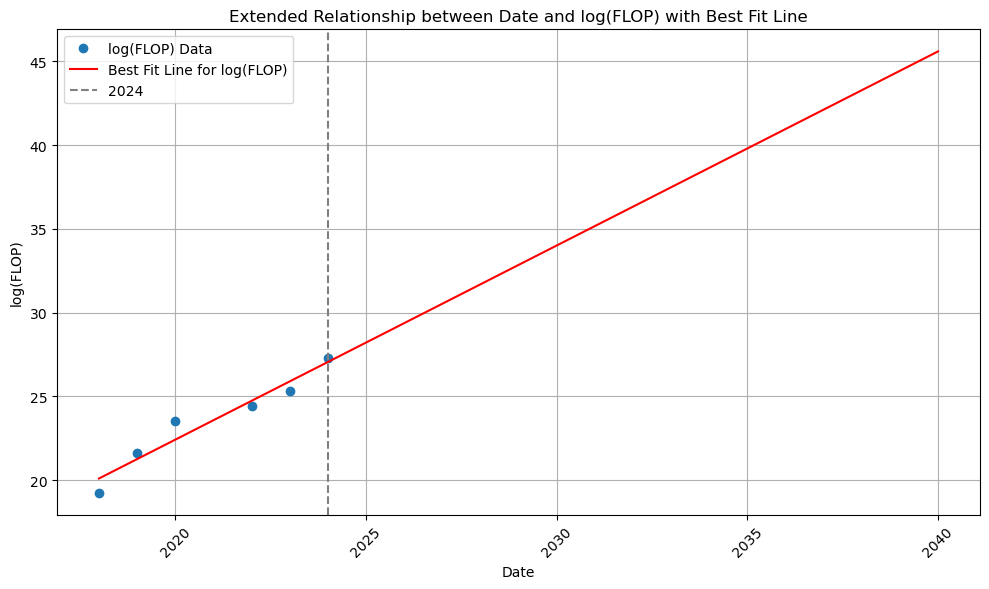

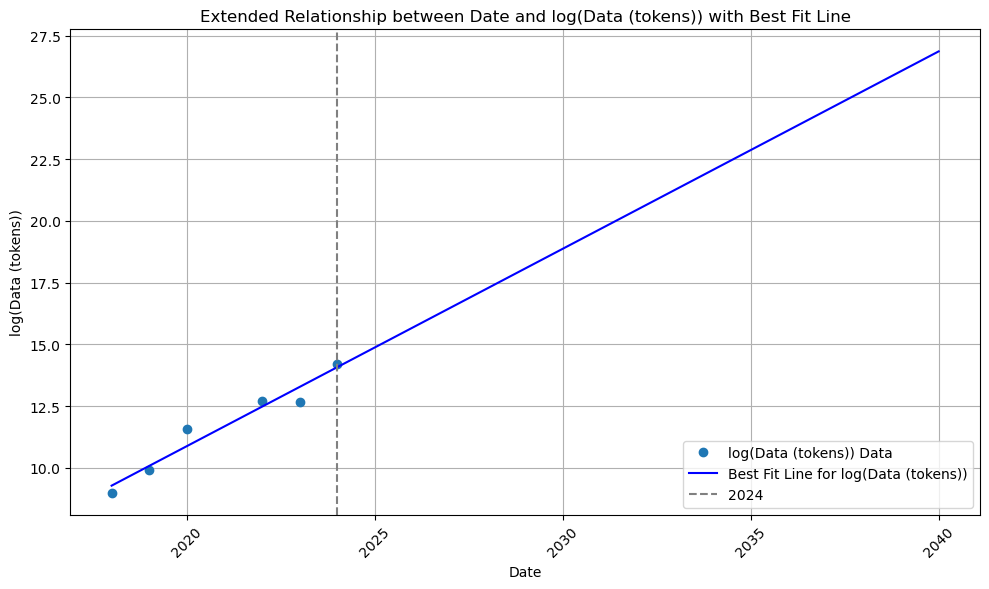

In [34]:
# Clean data: Drop rows with NaN values in 'Date', 'FLOP', or 'Data (tokens)' and convert types
df = df.dropna(subset=['Date', 'FLOP', 'Data (tokens)'])
df['Date'] = df['Date'].astype(int)
df['FLOP'] = pd.to_numeric(df['FLOP'], errors='coerce')
df['Data (tokens)'] = pd.to_numeric(df['Data (tokens)'], errors='coerce')

# Calculate log values
df['log_FLOP'] = np.log10(df['FLOP'])
df['log_Data (tokens)'] = np.log10(df['Data (tokens)'])

def plot_with_best_fit(df, x_col, y_col, y_label, line_color, plot_label):
    # Prepare data for linear regression
    X = df[x_col].values.reshape(-1, 1)
    y = df[y_col].values

    # Perform linear regression
    model = LinearRegression()
    model.fit(X, y)
    
    return model

# Plotting the relationships and storing the models
model_flop = plot_with_best_fit(df, 'Date', 'log_FLOP', 'log(FLOP)', 'red', 'log(FLOP)')
model_data = plot_with_best_fit(df, 'Date', 'log_Data (tokens)', 'log(Data (tokens))', 'blue', 'log(Data (tokens))')

# Extending the linear regression model to predict values out to 2040
# Define the years from the data range to 2040
years_extended = np.arange(df['Date'].min(), 2041).reshape(-1, 1)

# Perform linear regression predictions for FLOP and Data (tokens)
line_flop_extended = model_flop.predict(years_extended)
line_data_extended = model_data.predict(years_extended)

# Plotting the extended relationship between Date and log(FLOP) with the line of best fit
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['log_FLOP'], marker='o', linestyle='none', label='log(FLOP) Data')
plt.plot(years_extended, line_flop_extended, color='red', label='Best Fit Line for log(FLOP)')
plt.axvline(x=2024, color='grey', linestyle='--', label='2024')
plt.title('Extended Relationship between Date and log(FLOP) with Best Fit Line')
plt.xlabel('Date')
plt.ylabel('log(FLOP)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the extended relationship between Date and log(Data (tokens)) with the line of best fit
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['log_Data (tokens)'], marker='o', linestyle='none', label='log(Data (tokens)) Data')
plt.plot(years_extended, line_data_extended, color='blue', label='Best Fit Line for log(Data (tokens))')
plt.axvline(x=2024, color='grey', linestyle='--', label='2024')
plt.title('Extended Relationship between Date and log(Data (tokens)) with Best Fit Line')
plt.xlabel('Date')
plt.ylabel('log(Data (tokens))')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

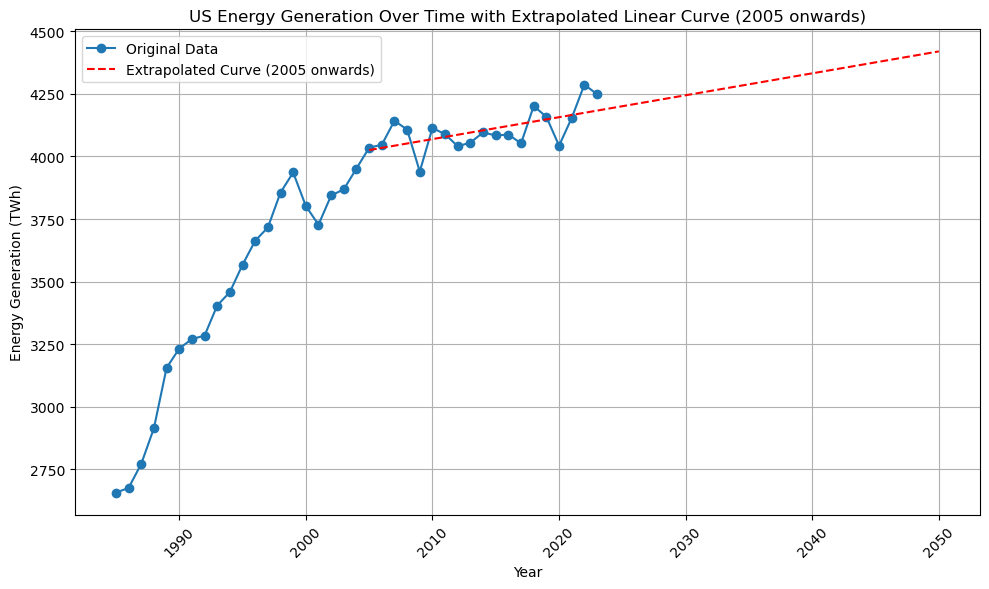

In [35]:
# Load the dataset
file_path = './electricity-generation.csv'
df = pd.read_csv(file_path)

# Display the first few rows to confirm the data structure
df.head()
# Rename columns for easier access
df.columns = ['Country', 'Code', 'Year', 'Generation']

# Filter the data for the United States
us_data = df[df['Country'] == 'United States']


# Filter the data for the United States and for years 2005 onwards
us_data_post_2005 = us_data[us_data['Year'] >= 2005]

# Prepare the data for linear regression
X = us_data_post_2005['Year'].values.reshape(-1, 1)
y = us_data_post_2005['Generation'].values

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values for the linear regression
years_extended = np.arange(2005, 2051).reshape(-1, 1)
predictions = model.predict(years_extended)

# Plot the original data and the linear regression curve from 2005 onwards
plt.figure(figsize=(10, 6))
plt.plot(us_data['Year'], us_data['Generation'], marker='o', label='Original Data')
plt.plot(years_extended, predictions, color='red', linestyle='--', label='Extrapolated Curve (2005 onwards)')

plt.title('US Energy Generation Over Time with Extrapolated Linear Curve (2005 onwards)')
plt.xlabel('Year')
plt.ylabel('Energy Generation (TWh)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [36]:
A_chinchilla = 406.4
B_chinchilla = 410.7
alpha_chinchilla = 0.34
beta_chinchilla = 0.28
E_chinchilla = 1.69


def loss_chinchilla(c_flop, D):
    # c_flop: max flop for the training run
    # D: max dataset size
    flop_per_datapoint_training = 6

    N = c_flop / (flop_per_datapoint_training * D)
    

    L = (
        A_chinchilla / N**alpha_chinchilla
        + B_chinchilla / D**beta_chinchilla
        + E_chinchilla
    )

    return L

In [37]:
def c_flop(available_flop, available_energy, energy_per_flop, energy_overhead_factor=2):
    # max available flop, based on available flop (hardware) and electricity

    # available_flop: floating point operations from the trends over time
    # available_energy: max energy that seems reasonable to spend on a training run
    # energy_per_flop: energy per flop of the GPU
    # energy_overhead_factor: account for the fact that training run energy isn't just flop, higher = more energy use

    available_flop_from_energy = available_energy / (energy_per_flop * energy_overhead_factor)
    
    max_available_flop = min(available_flop, available_flop_from_energy)

    return max_available_flop

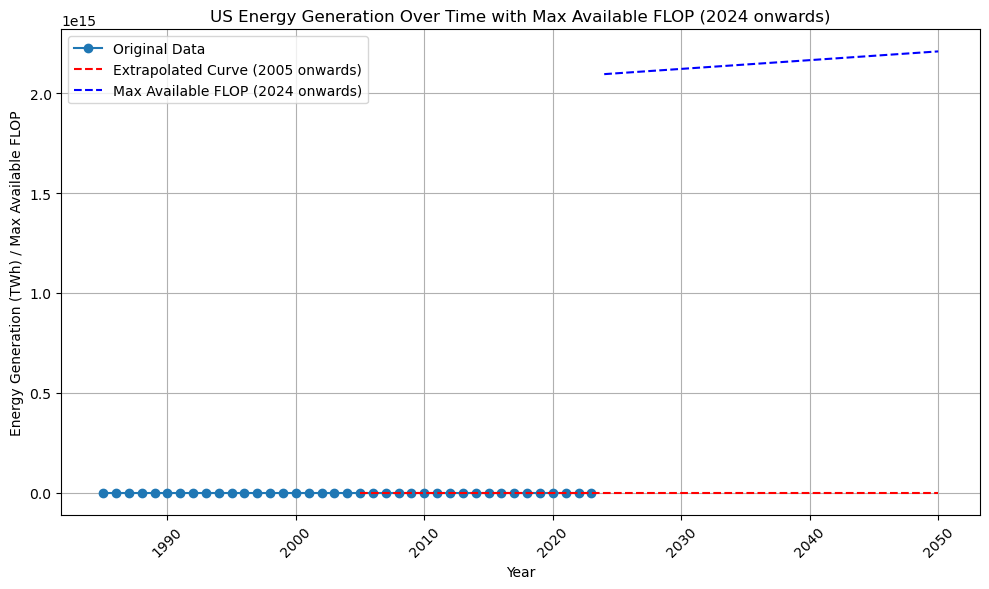

In [38]:
# Constants for the c_flop function
energy_per_flop = 1e-12  # Example value, adjust as needed

# Placeholder for available FLOP (this would normally come from another model)
available_flops = np.linspace(1e18, 1e21, len(years_extended))

# Calculate max available flop for each year from 2024 onwards
max_flops = [c_flop(af, ep, energy_per_flop) for af, ep in zip(available_flops, energy_predictions[19:])]

# Plot the original data, the linear regression curve from 2005 onwards, and the max available flop from 2024 onwards
plt.figure(figsize=(10, 6))
plt.plot(us_data['Year'], us_data['Generation'], marker='o', label='Original Data')
plt.plot(years_extended, energy_predictions, color='red', linestyle='--', label='Extrapolated Curve (2005 onwards)')
plt.plot(np.arange(2024, 2051), max_flops, color='blue', linestyle='--', label='Max Available FLOP (2024 onwards)')

plt.title('US Energy Generation Over Time with Max Available FLOP (2024 onwards)')
plt.xlabel('Year')
plt.ylabel('Energy Generation (TWh) / Max Available FLOP')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()